# ***Analysis of the Given Dataset***

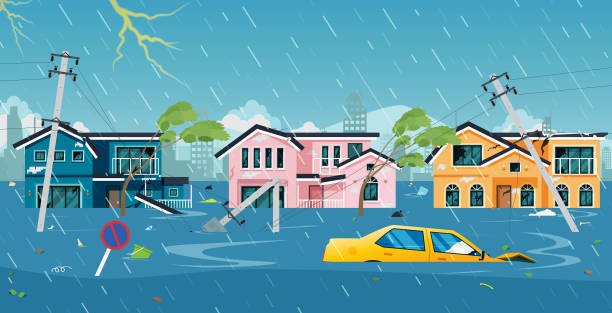

Data Dictionary:
The dataset contains 1,117,957 rows and 22 columns.
1. id: Unique identifier for each entry (integer).
2. MonsoonIntensity: A score representing the intensity of the monsoon (integer).
3. TopographyDrainage: A score representing the drainage quality of the topography (integer).
4. RiverManagement: A score reflecting the effectiveness of river management (integer).
5. Deforestation: A score indicating the extent of deforestation (integer).
6. Urbanization: A score measuring the level of urbanization (integer).
7. ClimateChange: A score reflecting the impact of climate change (integer).
8. DamsQuality: A score representing the quality of dams (integer).
9. Siltation: A score indicating the extent of siltation (integer).
10. AgriculturalPractices: A score reflecting the quality of agricultural practices (integer).
11. Encroachments: A score for encroachments on natural spaces (integer).
12. IneffectiveDisasterPreparedness: A score indicating the ineffectiveness of disaster preparedness measures (integer).
13. DrainageSystems: A score representing the quality of drainage systems (integer).
14. CoastalVulnerability: A score measuring the vulnerability of coastal areas (integer).
15. Landslides: A score indicating the risk or occurrence of landslides (integer).
16. Watersheds: A score reflecting the condition of watersheds (integer).
17. DeterioratingInfrastructure: A score representing the deterioration of infrastructure (integer).
18. PopulationScore: A score measuring population density or impact (integer).
19. WetlandLoss: A score reflecting the loss of wetlands (integer).
20. InadequatePlanning: A score indicating the inadequacy of planning measures (integer).
21. PoliticalFactors: A score reflecting political factors affecting the situation (integer).
22. FloodProbability: A continuous variable representing the probability of flooding (float).

We have a total of 3 csv files.
1. Train.csv is used as training set to build our machine lerarning model.
2. Test.csv us used to test our model's performance.
3. Submission.csv is an unseen data of which we are supposed to predict the label.

Our dataset (both train and test) was generated from a deep learning model trained on the Flood Prediction Factors dataset. Feature distributions are close to, but not exactly the same, as the original. We want to predict the probability of flood occuring using logistic regression.

We analyzed our dataset and it has no null values and all the columns are numeric so no mapping was required for this dataset. The only column we dropped was the id column as it has no relation with any of the features.

We then did some analysis on the column to show hoe much related they are to each other and plotted a heatmap from correlation matrix.

After all the cleaning is done for train dataset, we also did the same steps for test dataset. And when the cleaning is done, it is time to built our model.

As mentioned above we want to predict if flood is going to occur or not. It is a binary outcome, yes or no but our floodprobability column has a range of probabilities and thus we decided to use a threshold value. According to this if the probability is greated then threshold, then the prediction will be yes otherwise no. And to determine this threshold, we first determined the max and minimum values of the floodprobability column and took its median value as the threshold.

We choosed logistic regression to train our model and tried tuning the model for further increase in accuracy but there was no change in the accuracy.

Finally we recorded the accuracy score and built confusion matrix and roc curve where auc value is 0.92 which shows that our model is performing fairly well.

# ***Dataset Characteristics and Exploratory Data Analysis***

### Loading our dataset from drive and reviewing the data.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#annita
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


traindf = pd.read_csv('/content/drive/MyDrive/CSE303LAB/Flood/train.csv')
testdf = pd.read_csv('/content/drive/MyDrive/CSE303LAB/Flood/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/CSE303LAB/Flood/sample_submission.csv')

In [46]:
traindf.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


<Axes: >

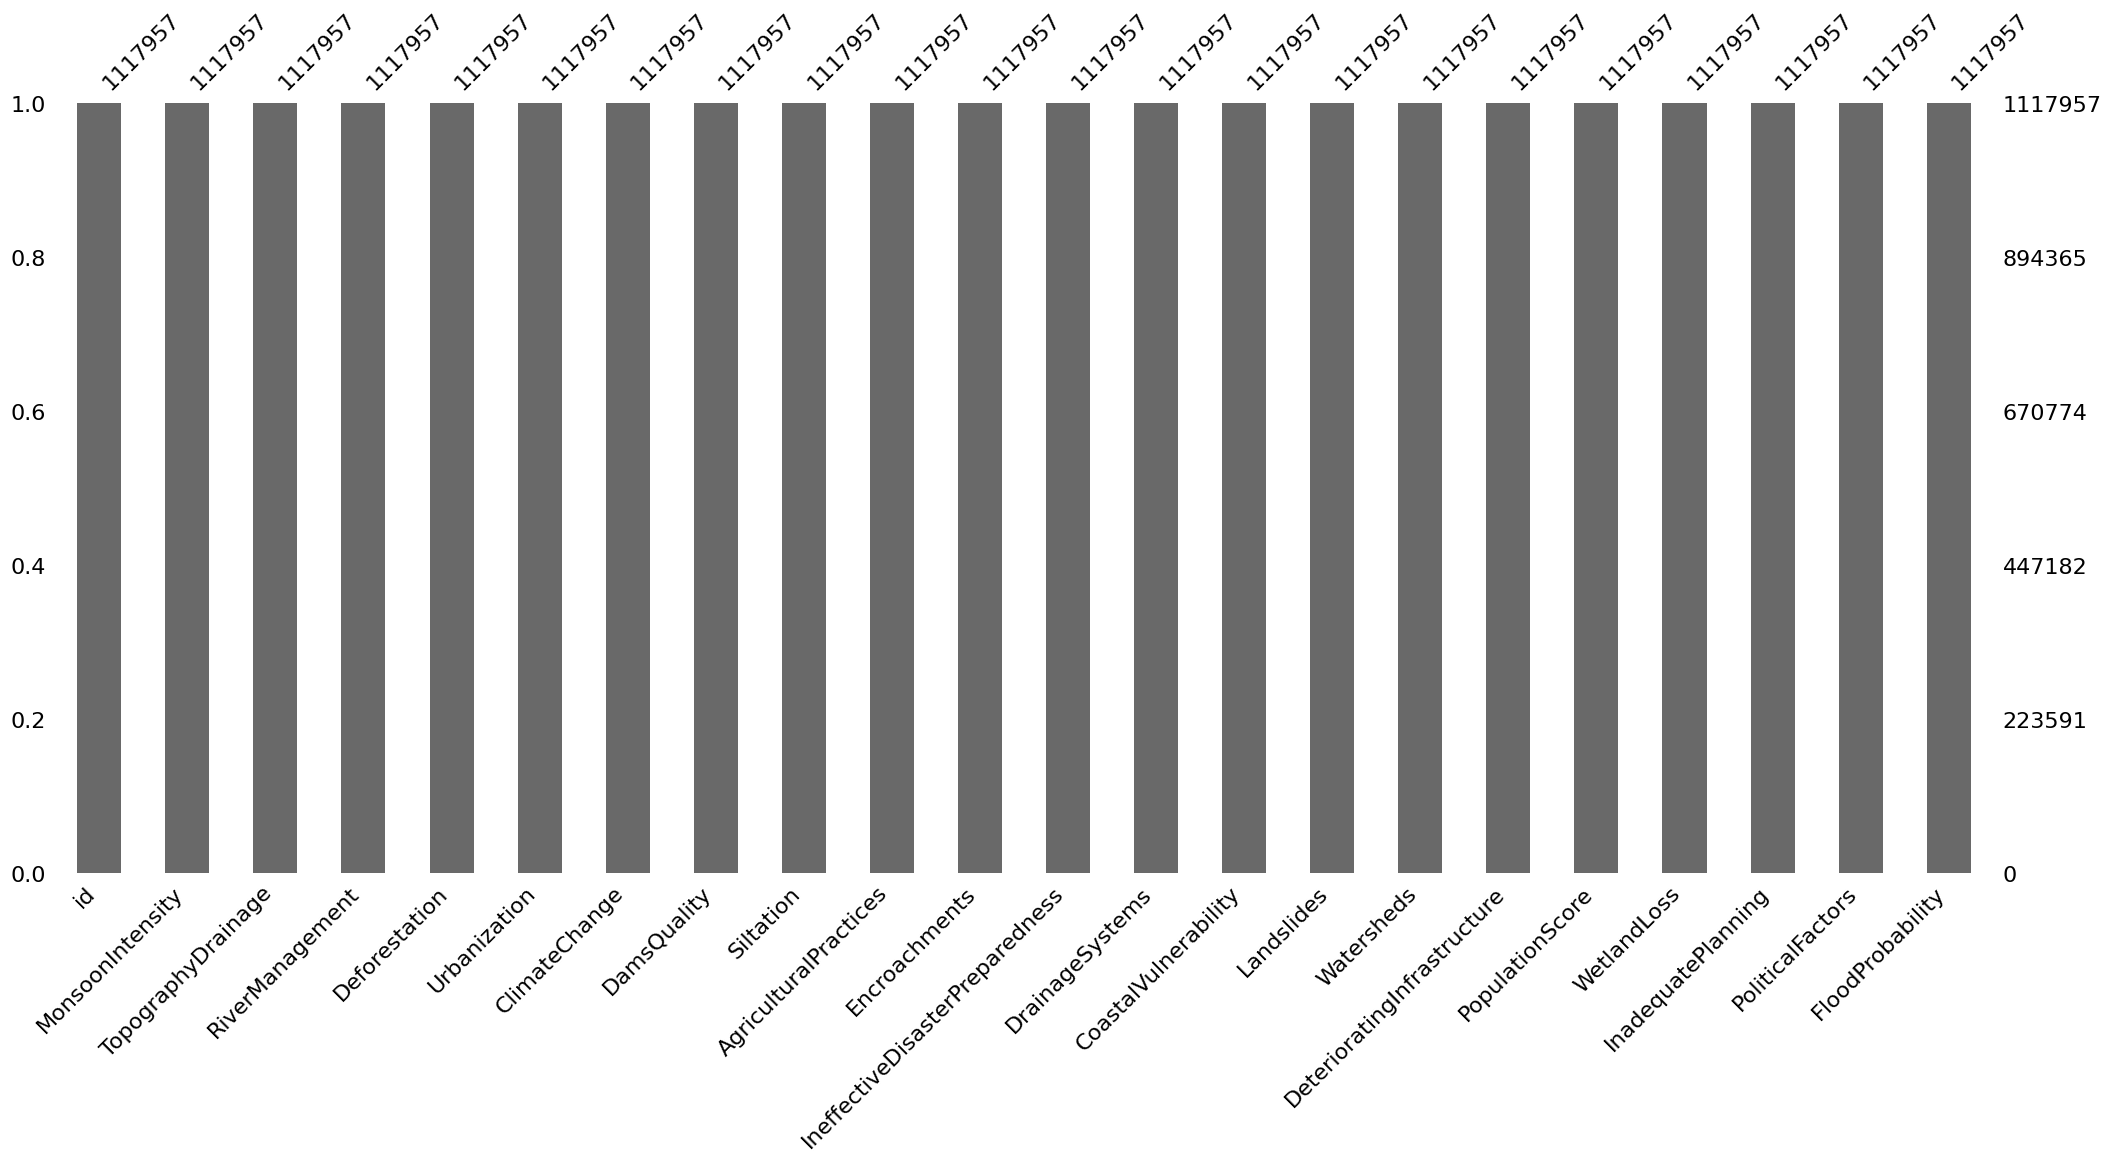

In [47]:
import missingno as msno
msno.bar(traindf)

In [48]:
traindf.isnull().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


In [49]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [50]:
traindf.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [51]:
traindf.corr()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


Increase the size of the heatmap and adjust the font size of the annotations to make the correlation values clearer.

fmt='.2f': Limits the decimal places to two, reducing visual clutter.

annot_kws={"size": 10}: Adjusts the annotation font size.

plt.xticks(rotation=45, ha='right'): Rotates the x-axis labels for better readability.

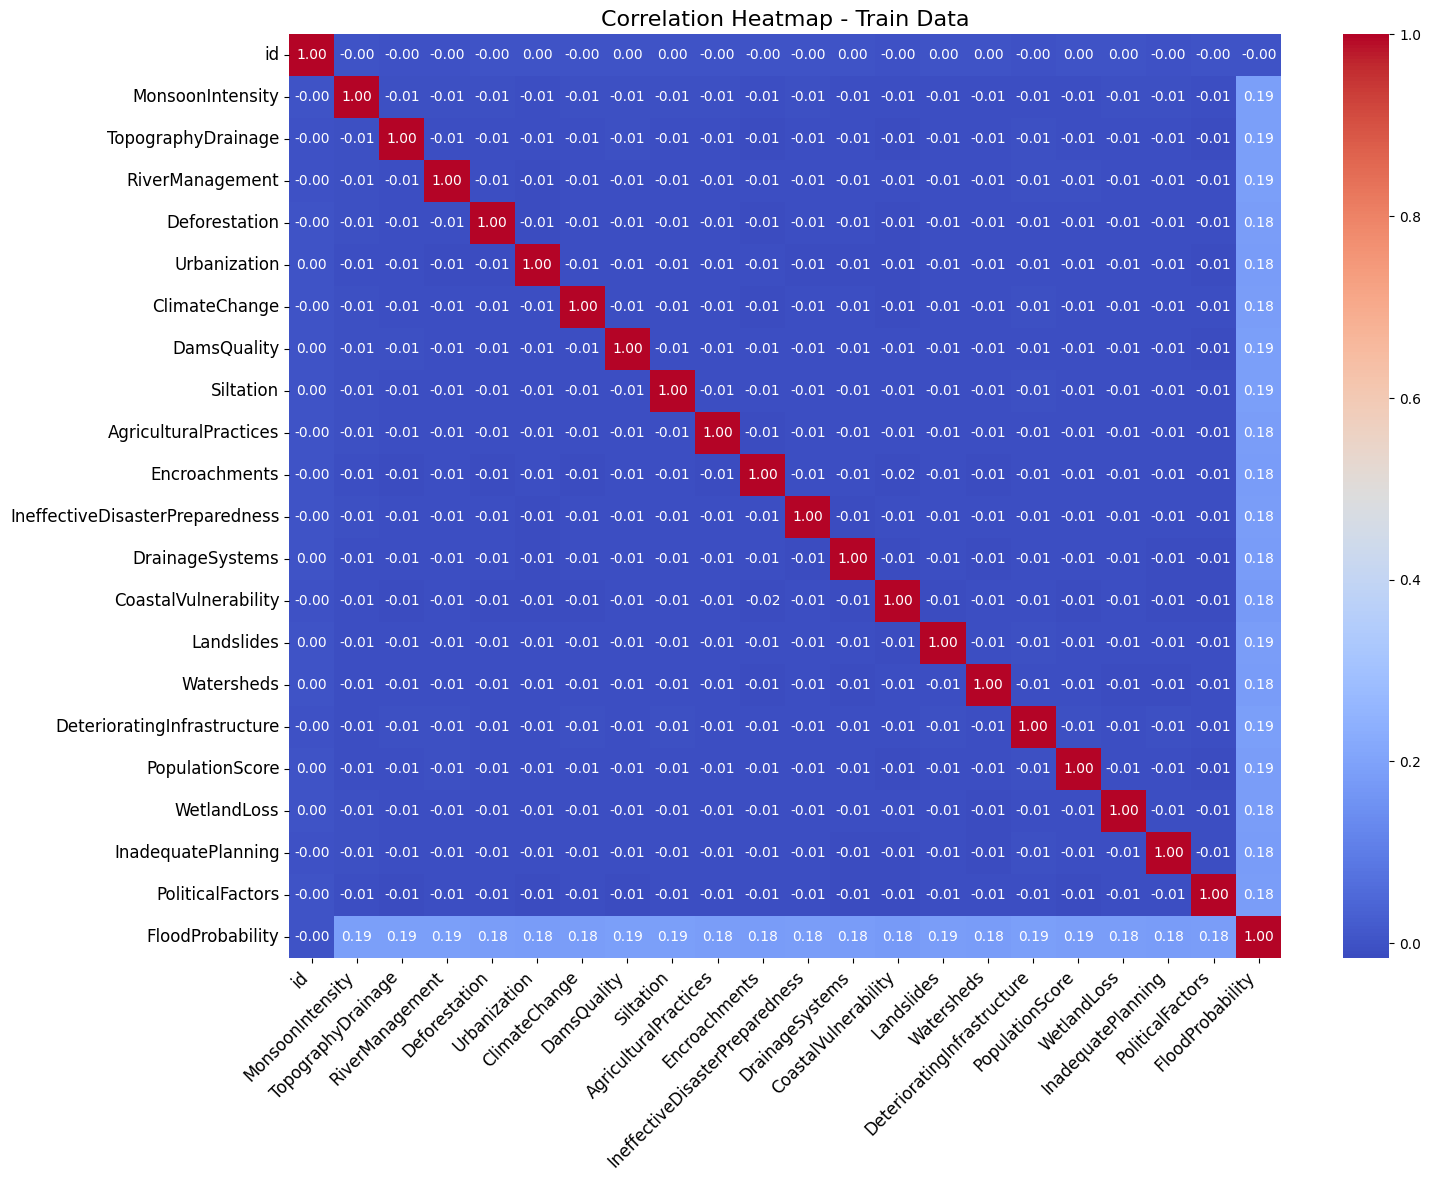

In [52]:
plt.figure(figsize=(16,12))
sns.heatmap(traindf.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap - Train Data', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Analysing Patterns using Visualisations

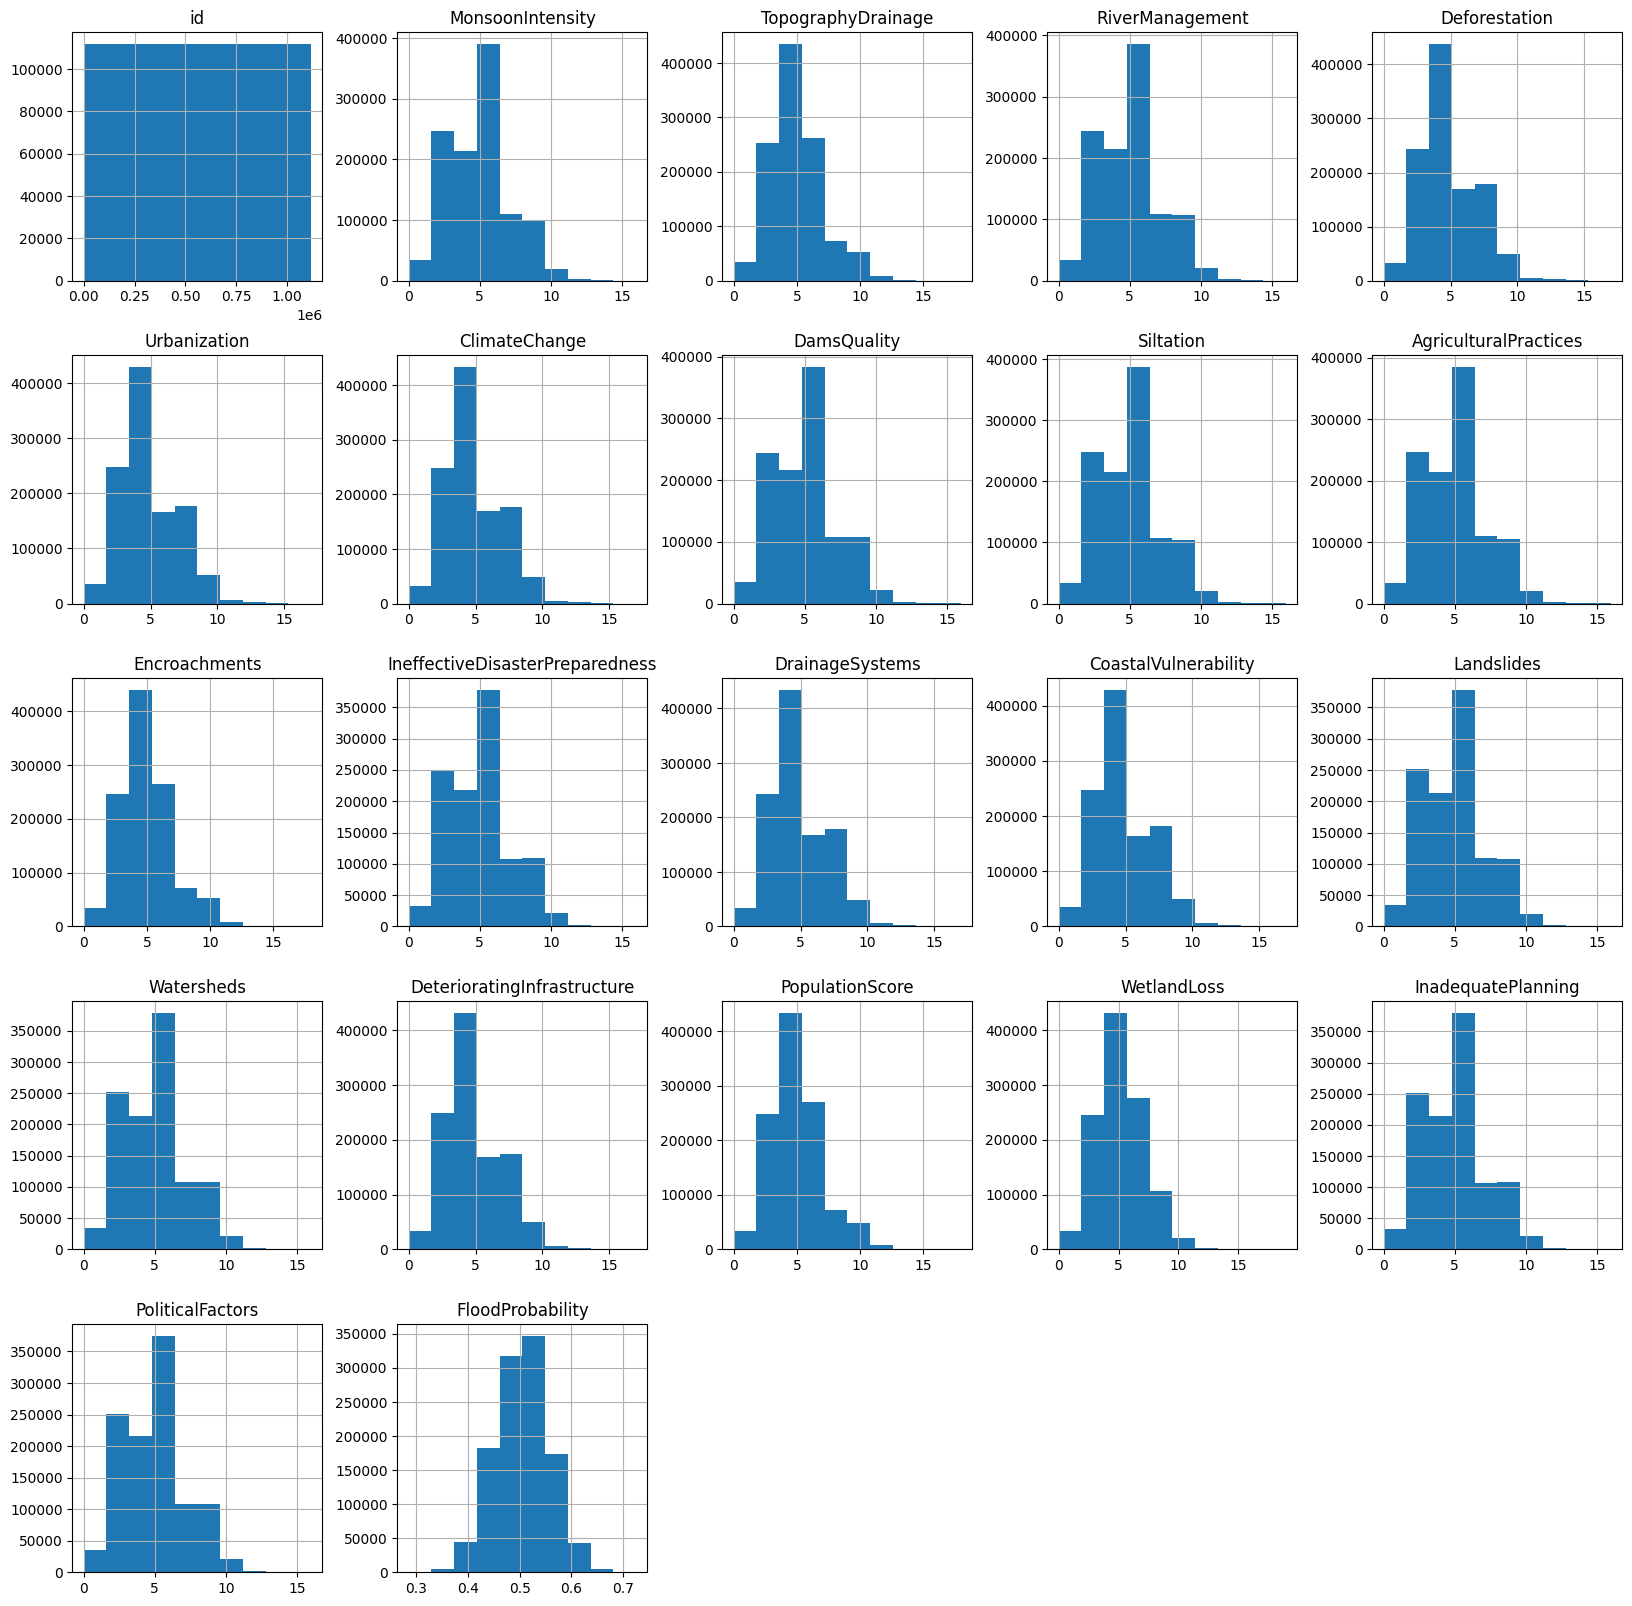

In [53]:
h=traindf.hist(figsize=(20,20))

In [54]:
traindf['FloodProbability'].value_counts()

,count
FloodProbability,
0.490,43320
0.495,42302
0.520,41266
0.485,41156
0.505,41126
...,...
0.700,32
0.725,29
0.715,26


<Axes: xlabel='FloodProbability'>

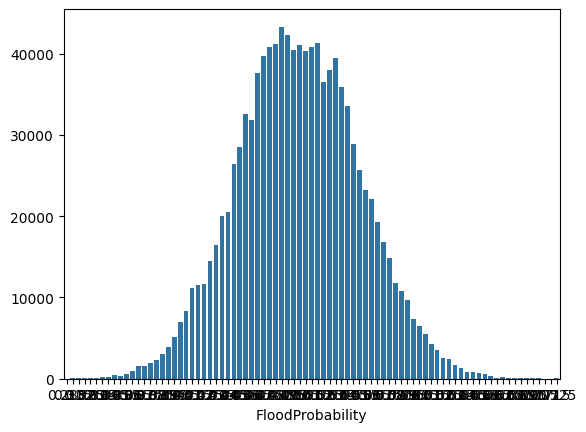

In [55]:
sns.barplot(x=traindf['FloodProbability'].value_counts().keys(),y=traindf['FloodProbability'].value_counts().values)

We are getting a bell shaped curve for the flood probability and so we can say that our dataset is normally distributed


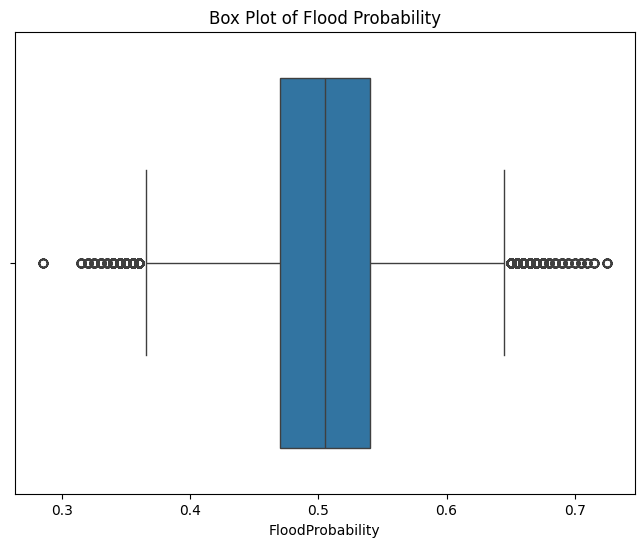

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='FloodProbability', data=traindf)
plt.title('Box Plot of Flood Probability')
plt.show()

We generated a box plot to display the distribution of FloodProbability in the dataset. The plot shows key statistics like the median, quartiles, and potential outliers for flood probability values.

Using the box plot we can quickly understand the central tendency, variability, and any extreme values (outliers) in the flood probability data, which can help us to assess its overall distribution and spread.

From the boxplot of flood probability, we can see the targeted column has a large number of outliers and so median will be suitable for threshold


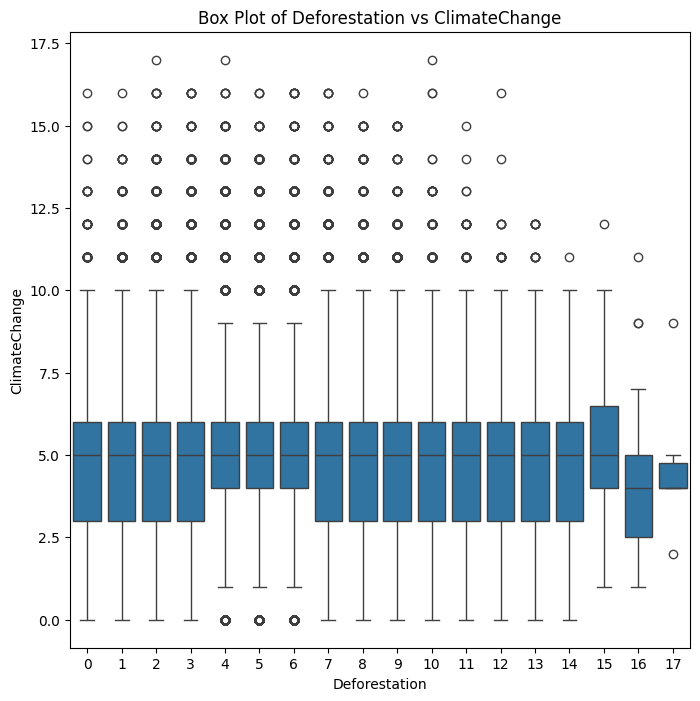

In [57]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Deforestation', y='ClimateChange', data=traindf)
plt.title('Box Plot of Deforestation vs ClimateChange')
plt.show()

Here we have created box plot diagram to show the relationship between Deforestation (x-axis) and ClimateChange (y-axis). The box plot provides a visual summary of how ClimateChange values are distributed for different levels or categories of Deforestation. It can also help identify trends, variability, and potential outliers in the data.
It offers a clear way to see if higher deforestation is associated with changes in climate, making patterns and distributions easy to interpret.

Since our attributes have same value of correlation with one another, their comparison with one another will result in a similar pattern. Also from the comparison of climate change and deforestation we found a lot of outliers.


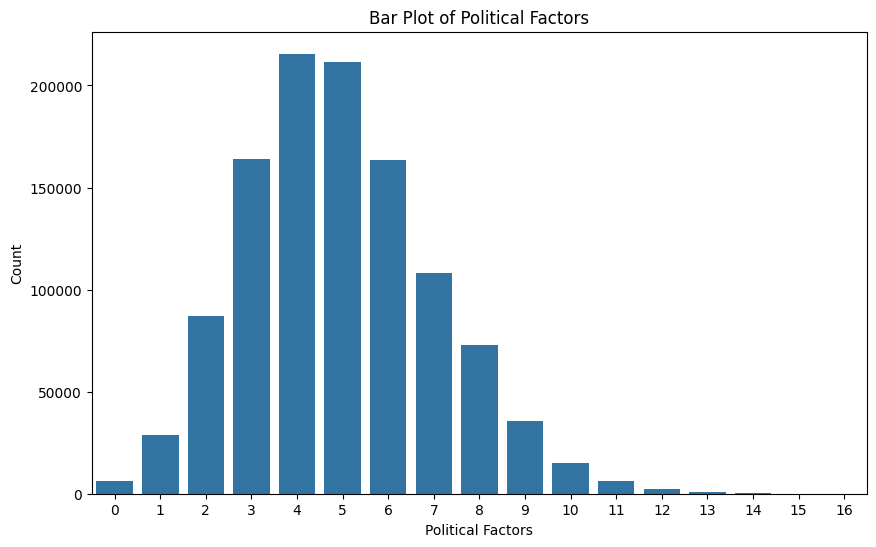

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=traindf['PoliticalFactors'].value_counts().keys(), y=traindf['PoliticalFactors'].value_counts().values)
plt.title('Bar Plot of Political Factors')
plt.xlabel('Political Factors')
plt.ylabel('Count')
plt.show()


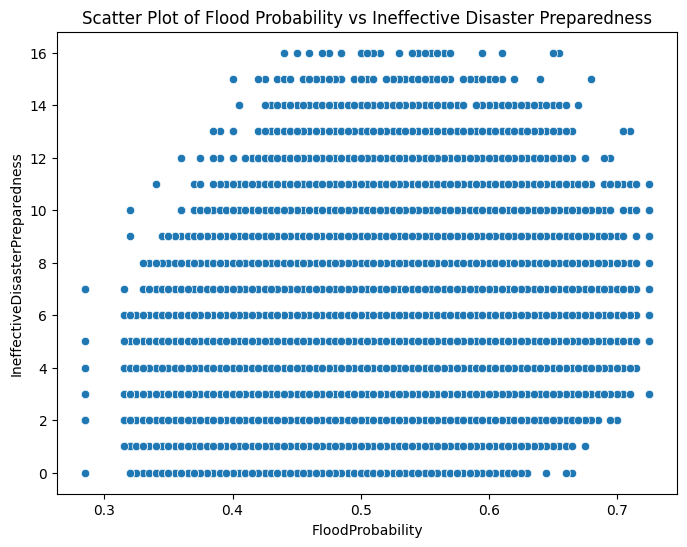

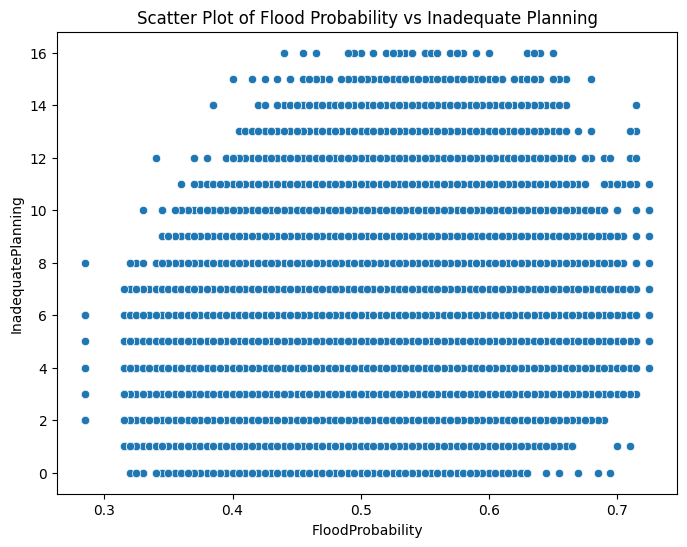

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FloodProbability', y='IneffectiveDisasterPreparedness', data=traindf)
plt.title('Scatter Plot of Flood Probability vs Ineffective Disaster Preparedness')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='FloodProbability', y='InadequatePlanning', data=traindf)
plt.title('Scatter Plot of Flood Probability vs Inadequate Planning')
plt.show()


We generated two scatter plots to explore the relationship between FloodProbability and two attributes: Ineffective Disaster Preparedness and Inadequate Planning.

The first plot shows how Ineffective Disaster Preparedness relates to FloodProbability. The second plot displays the relationship between Inadequate Planning and FloodProbability, helping us see if inadequate planning is linked to increased flood risk. These visualizations highlight how weaknesses in preparedness and planning might affect flood probabilities.

But we can see, despite the attribute being different in both scatterplots, the shape is the same for both. This is due to the similar value of correlation. And we can assume all the scatterplot might look the same against flood probability.

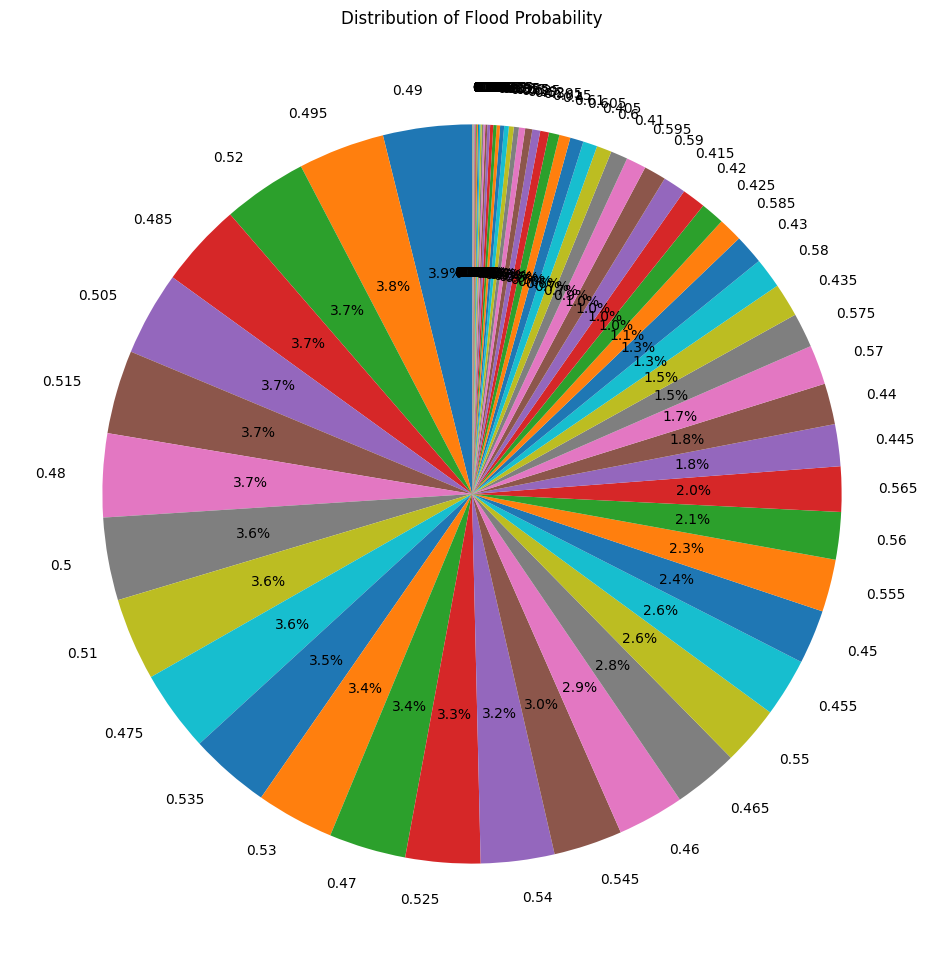

In [60]:
plt.figure(figsize=(12, 12))
traindf['FloodProbability'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flood Probability')
plt.ylabel('')
plt.show()

We have generated a pie chart that shows the distribution of different FloodProbability values in our traindf dataset. Each slice represents the proportion of instances for each flood probability and are labeled with percentages.

Using the chart, we can quickly understand how flood risk is distributed across the dataset, such as the flood probability of 0.49 is the most common but the presence of 0.485, 0.505. 0.52, 0.515 and 0.48 are present in equal amounts.


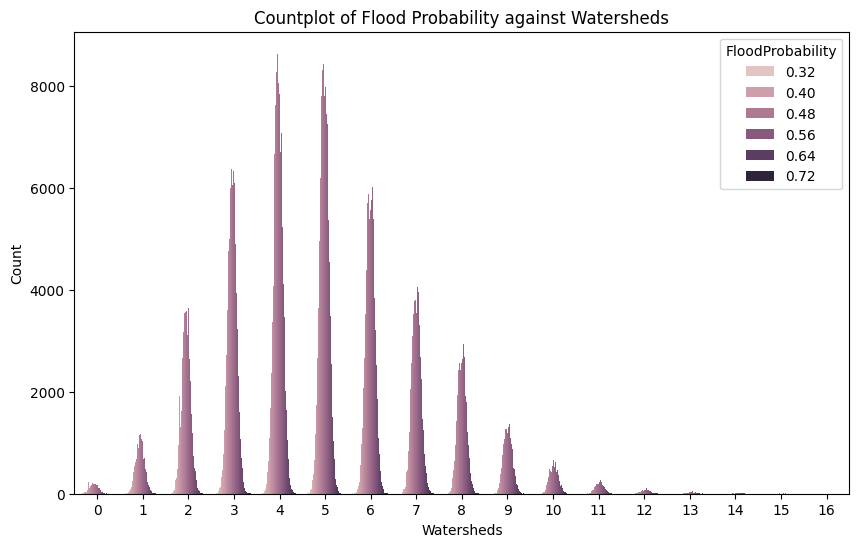

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Watersheds', hue='FloodProbability', data=traindf)
plt.title('Countplot of Flood Probability against Watersheds')
plt.xlabel('Watersheds')
plt.ylabel('Count')
plt.show()


We have created a bar chart (count plot) to show how FloodProbability is distributed across different Watersheds in the our traindf dataset.
Here x-axis represents the Watersheds, and the bars are split by FloodProbability values (shown by different colors). The height of each bar shows how many instances of each flood probability occur in each watershed.

Using this chart we can easily compare the flood risk across different watersheds and see which ones are more prone to flooding. Here watersheds are greater in numebr around 0.48 and 0.56 flood probabilities and so we can say during flood, more watersheds are readily available.

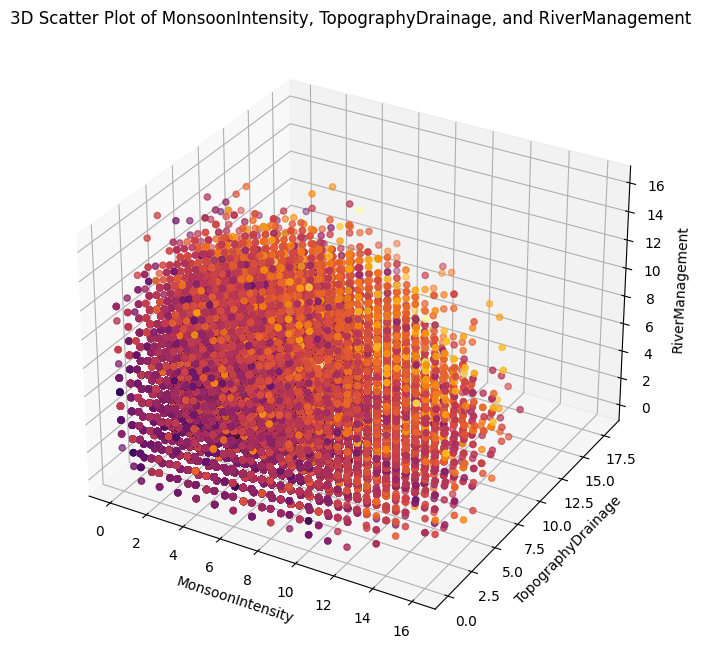

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
d = fig.add_subplot(111, projection='3d')
x = traindf['MonsoonIntensity']
y = traindf['TopographyDrainage']
z = traindf['RiverManagement']

d.scatter(x, y, z, c=traindf['FloodProbability'], cmap='inferno')
d.set_xlabel('MonsoonIntensity')
d.set_ylabel('TopographyDrainage')
d.set_zlabel('RiverManagement')
d.set_title('3D Scatter Plot of MonsoonIntensity, TopographyDrainage, and RiverManagement')

plt.show()


This is a 3D representation of the first 3 columns of our traindf dataset which shows how MonsoonIntensity, TopographyDrainage, and RiverManagement influence FloodProbability. The x, y, z axes shows the first 3 features while the color of each point indicates the flood risk. For the color of the points we used "inferno" color map.

From this plot we can idenify how different combinations of monsoon internsity, drainage and rivermanagement affect the flood probabilities faster which makes it easier to spot patterns and make decisions about flood predictions.


Prepare the Training Data
- Separate Features and Target (Training Data)

Separate your features (independent variables) from the target (FloodProbability).

In [63]:
x= traindf.drop(columns=['id', 'FloodProbability'])
y= traindf['FloodProbability']

In [64]:
x.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


Prepare the Test Data

Use the same feature columns in the test dataset, but we don’t have the target (FloodProbability) column in the test set.

In [65]:
testdf

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


<Axes: >

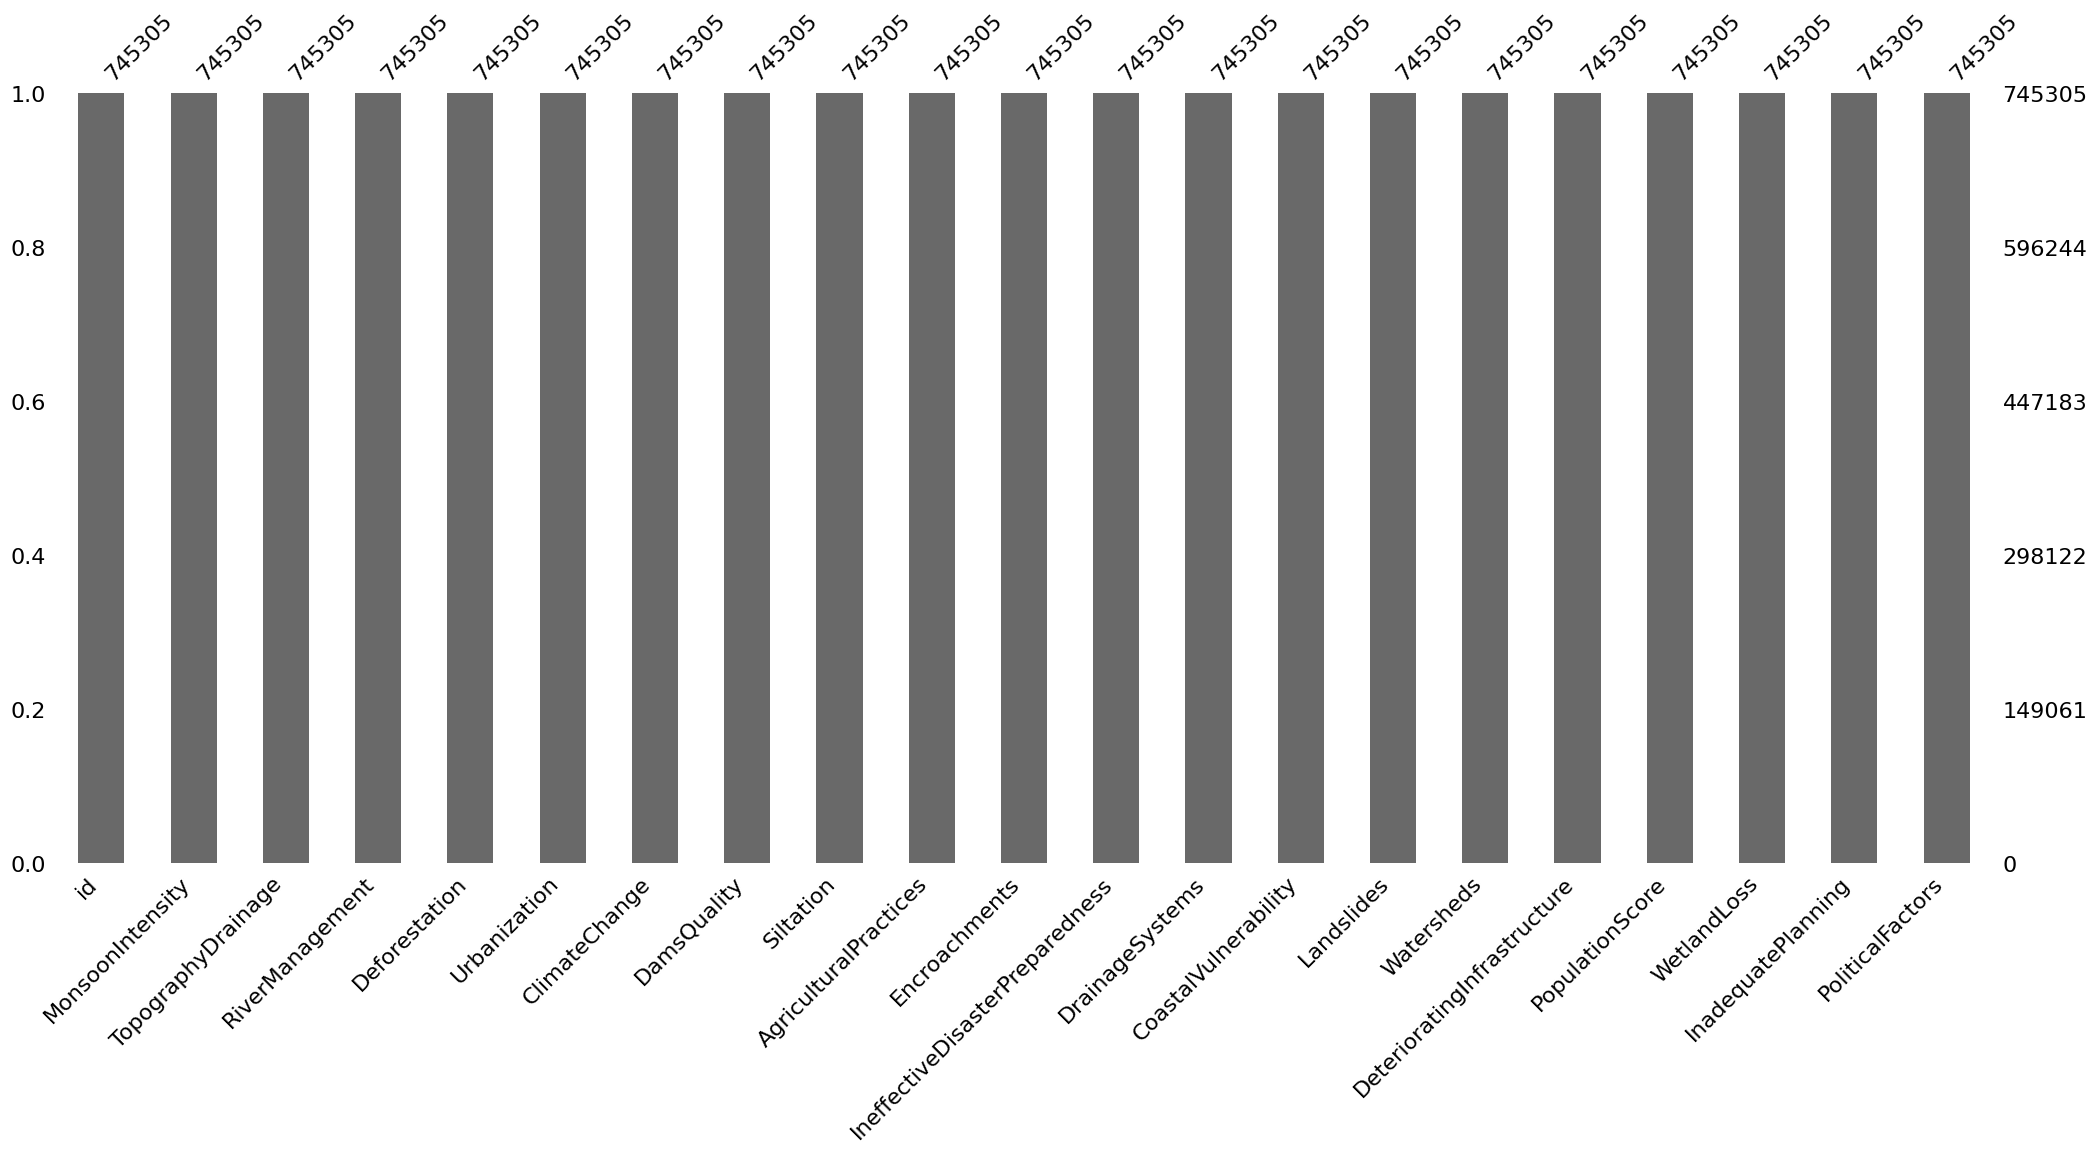

In [66]:
msno.bar(testdf)

In [67]:
test = testdf.copy()
test.drop(columns=['id'],inplace=True)
test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability          

In [69]:
test1 = test.copy()
test1 = pd.get_dummies(test1)
test1.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [70]:
test1.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


Train the Logistic Regression Model
- Now, fit the logistic regression model using the training dataset.

In [71]:
def find_outliers_IQR(traindf):

   q1=traindf.quantile(0.25)

   q3=traindf.quantile(0.75)

   IQR=q3-q1

   outliers = traindf[((traindf<(q1-1.5*IQR)) | (traindf>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(traindf['FloodProbability'])


print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 5579
max outlier value: 0.725
min outlier value: 0.285


In [72]:
med_val=traindf['FloodProbability'].median()
print(med_val)

0.505


Convert Continuous Target to Binary
- We can decide on a threshold for the FloodProbability to classify it as 0 or 1.
For example, we have used a threshold of 0.505 as flood probability column has a huge number of outliers and so we used the median value of flood probability which is 0.505 as out threshold.

In [73]:
from sklearn.linear_model import LogisticRegression
threshold = 0.505
y_thres = (y >= threshold).astype(int)
reg = LogisticRegression(max_iter=1000)
reg.fit(x, y_thres)

LogisticRegression(max_iter=1000)

In [74]:
print(reg.coef_)
print(reg.intercept_)

[[0.41835066 0.42865087 0.42882811 0.42904459 0.4285973  0.42864878
  0.42887341 0.42406982 0.42559262 0.42560042 0.42796274 0.424403
  0.43015342 0.42610016 0.42943374 0.42200743 0.42882332 0.42383357
  0.4252474  0.42615694]]
[-41.86662697]



The target variable y for logistic regression should be binary (or categorical), but it is continuous (floating-point values).
- Logistic regression is used for classification tasks, not for continuous target variables.

To fix this, we need to ensure that y contains only binary or categorical values (e.g., 0 or 1 for binary classification).

In this case, the target column (FloodProbability) might be a continuous probability value. Hence, we convert it into binary values (e.g., 0 for non-flood, 1 for flood) using a threshold.

Predict on Test Data
- When making predictions on the test data, the output will be probabilities, and you can apply the same threshold to classify them into flood/non-flood.

In [75]:
y_test_pred_prob = reg.predict_proba(test1)[:,1]
y_test_pred = (y_test_pred_prob >= threshold).astype(int)

Evaluate the Model (On the Training Set)

Now that your logistic regression model has been trained with the binary target (FloodProbability), let's evaluate its performance using the following metrics:

- Accuracy: The ratio of correctly predicted instances.
- Precision: It measures the accuracy of positive predictions.
- Recall: It measures the ability to find all the positive instances
- F1-Score: It  is the harmonic mean of Precision and Recall, providing a balance between the two.
- Confusion Matrix: A matrix to evaluate the performance of the model based on actual vs predicted values.
- ROC-AUC Score: Measures the quality of the model's classification by analyzing the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,precision_score, recall_score, f1_score

y_train_pred = reg.predict(x)

accuracy = accuracy_score(y_thres, y_train_pred)
print(f"Training Accuracy: {accuracy:.4f}")

precision = precision_score(y_thres,  y_train_pred)
print("Precision:", precision)

recall = recall_score(y_thres,  y_train_pred)
print("Recall (Sensitivity):", recall)

f1 = f1_score(y_thres,  y_train_pred)
print("F1-Score:", f1)

cm = confusion_matrix(y_thres, y_train_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_thres, reg.predict_proba(x)[:,1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

Training Accuracy: 0.8874
Precision: 0.9242475837739805
Recall (Sensitivity): 0.8484196588191081
F1-Score: 0.8847118069862199
Confusion Matrix:
[[508926  39597]
 [ 86315 483119]]
ROC-AUC Score: 0.9247


Confusion Matrix (Training Set) Visualization

- Visualizing the confusion matrix helps you understand how well the model distinguishes between floods and non-floods in the training dataset.

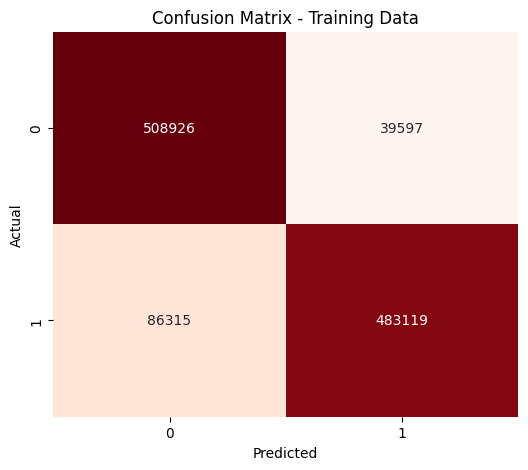

In [77]:
# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ROC Curve (Training Set)
- The ROC curve visualizes the trade-off between sensitivity and specificity, giving insight into the model's ability to classify flood vs non-flood cases.

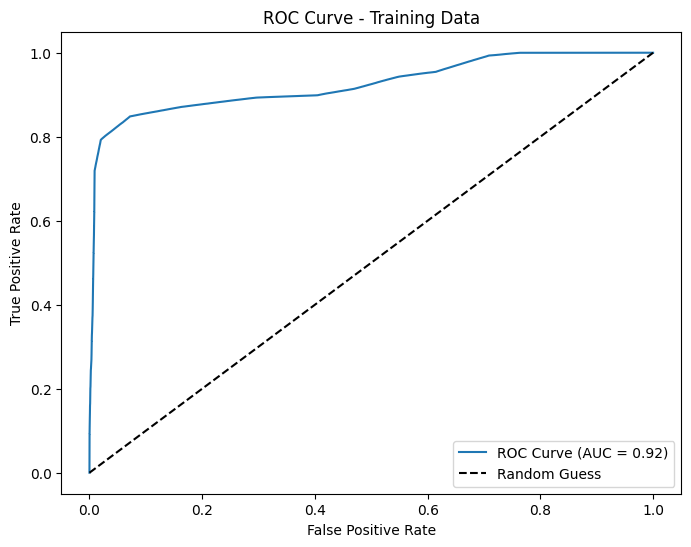

In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_thres, reg.predict_proba(x)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')
plt.show()

Evaluate Model Performance on Test Data
- Although we won’t have the ground truth labels for the test dataset, we can still use the model to predict the probabilities and classify floods in the test data.

In [79]:
y_test_pred_prob = reg.predict_proba(test1)[:,1]

threshold = 0.505
y_test_pred = (y_test_pred_prob >= threshold).astype(int)

submission = pd.DataFrame({'id': testdf['id'], 'FloodProbability': y_test_pred_prob, 'FloodClass': y_test_pred})
submission.to_csv('flood_predictions.csv', index=False)

In [80]:
predicteddf = pd.read_csv('/content/flood_predictions.csv')

In [81]:
predicteddf

,id,FloodProbability,FloodClass
0,1117957,0.996007,1
1,1117958,0.030941,0
2,1117959,0.030298,0
3,1117960,0.069087,0
4,1117961,0.065671,0
...,...,...,...
745300,1863257,0.141830,0
745301,1863258,0.019765,0
745302,1863259,0.999911,1
745303,1863260,0.977490,1


Here Flood class shows our prediction where 1 means yes flood will occur and 0 means no flood will not occur

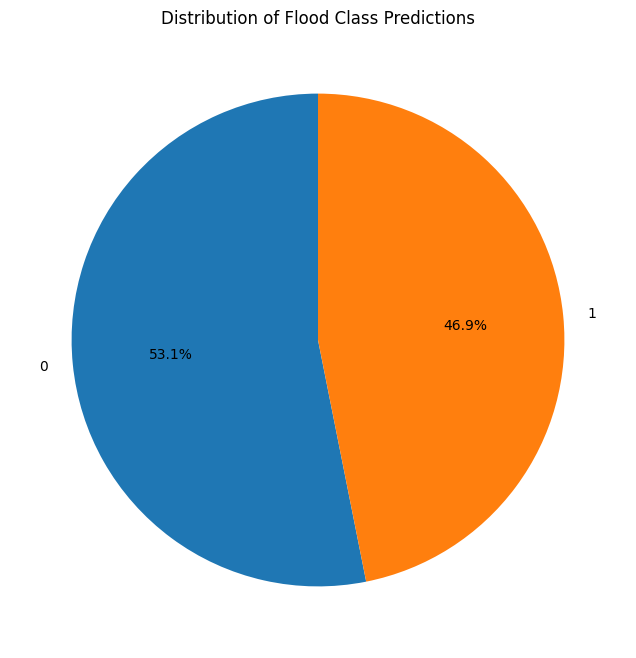

In [82]:
plt.figure(figsize=(8, 8))
predicteddf['FloodClass'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flood Class Predictions')
plt.ylabel('')
plt.show()

We will now try tuning our model to see if we can increase the accuracy any further.

In [83]:
#tunig model 1
from sklearn.linear_model import LogisticRegression
reg_tune = LogisticRegression(penalty='none',random_state=0)
reg_tune.fit(x, y_thres)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [84]:
y_train_pred1 = reg_tune.predict(x)

accuracy1 = accuracy_score(y_thres, y_train_pred1)
print(f"Training Accuracy: {accuracy1:.4f}")

precision1 = precision_score(y_thres,  y_train_pred1)
print("Precision:", precision1)

recall1 = recall_score(y_thres,  y_train_pred1)
print("Recall (Sensitivity):", recall1)

f1_1 = f1_score(y_thres,  y_train_pred1)
print("F1-Score:", f1_1)

cm1 = confusion_matrix(y_thres, y_train_pred1)
print("Confusion Matrix:")
print(cm1)

roc_auc1 = roc_auc_score(y_thres, reg_tune.predict_proba(x)[:,1])
print(f"ROC-AUC Score: {roc_auc1:.4f}")

Training Accuracy: 0.8874
Precision: 0.9242475837739805
Recall (Sensitivity): 0.8484196588191081
F1-Score: 0.8847118069862199
Confusion Matrix:
[[508926  39597]
 [ 86315 483119]]
ROC-AUC Score: 0.9247


In [85]:
from sklearn.linear_model import LogisticRegression
reg_tune2 = LogisticRegression(penalty='l2',solver='lbfgs',C=1.0,max_iter=1000)
reg_tune2.fit(x, y_thres)

LogisticRegression(max_iter=1000)

In [86]:
y_train_pred2 = reg_tune2.predict(x)

accuracy2 = accuracy_score(y_thres, y_train_pred2)
print(f"Training Accuracy: {accuracy2:.4f}")

precision2 = precision_score(y_thres,  y_train_pred2)
print("Precision:", precision2)

recall2 = recall_score(y_thres,  y_train_pred2)
print("Recall (Sensitivity):", recall2)

f1_2 = f1_score(y_thres,  y_train_pred2)
print("F1-Score:", f1_2)

cm2 = confusion_matrix(y_thres, y_train_pred2)
print("Confusion Matrix:")
print(cm2)

roc_auc2 = roc_auc_score(y_thres, reg_tune2.predict_proba(x)[:,1])
print(f"ROC-AUC Score: {roc_auc2:.4f}")

Training Accuracy: 0.8874
Precision: 0.9242475837739805
Recall (Sensitivity): 0.8484196588191081
F1-Score: 0.8847118069862199
Confusion Matrix:
[[508926  39597]
 [ 86315 483119]]
ROC-AUC Score: 0.9247


We used two tuning model one default model and another one we used some parameters of our choice, but there was no change in accuracy, precision, recall, f1scrore, auc score, or confusion matrix.